Visão Geral dos Dados:

-Comece carregando os dados e obtendo uma visão geral.
-Verifique o número de linhas e colunas.
-Identifique os tipos de dados de cada coluna (numérico, categórico, etc.).
-Procure por valores ausentes (NaNs) em cada coluna.

In [35]:
# Importando as Bibliotecas que usaremos neste momento
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregando os dados e visualizando as 5 primeiras linhas
df_titanic = pd.read_csv('train.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_titanic.shape #Tamamnho das linhas e colunas

(891, 12)

In [5]:
df_titanic.info() #Verificando informacoes dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_titanic.describe() #Resumo estatistico dos dados

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_titanic.describe(include=['O']) #Resumo estatistico dos dados colunas categóricas.

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
df_titanic.isnull().sum() #Verificando dados nulos

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Compreendendo a Coluna "Pclass"

O que ela representa: "Pclass" indica a classe de viagem do passageiro (1ª, 2ª ou 3ª classe).
Tipo de dado: É uma variável categórica ordinal, o que significa que as categorias têm uma ordem (1ª > 2ª > 3ª).

In [12]:
agrupando_pclass = df_titanic['Pclass'].value_counts()
agrupando_pclass.index = ['Primeira classe (1)', 'Segunda classe (2)', 'Terceira classe (3)']
agrupando_pclass

Primeira classe (1)    491
Segunda classe (2)     216
Terceira classe (3)    184
Name: count, dtype: int64

Visualização:
Crie um gráfico de barras para visualizar a contagem de passageiros por classe.

Taxa por classe: Qual a porcentagem de passageiros que classe?

Porcentagem de Primeira Classe: 55.11%
Porcentagem de Segunda Classe: 24.24%
Porcentagem de Terceira Classe: 20.65%


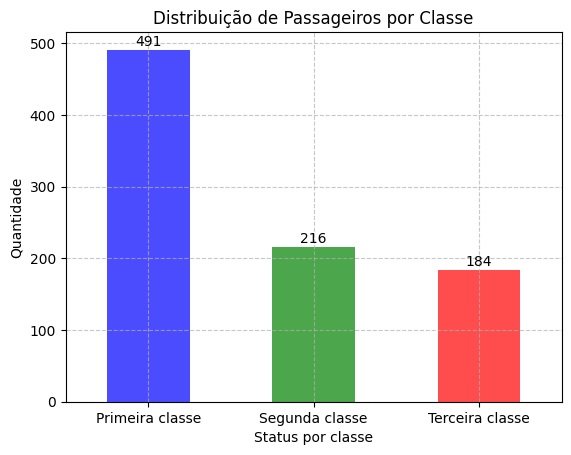

In [29]:
# Criando o gráfico de barras
agrupando_pclass.plot(kind='bar', color=['blue', 'green', 'red'], alpha=0.7)
plt.title('Distribuição de Passageiros por Classe')
plt.xlabel('Status por classe')
plt.ylabel('Quantidade')
plt.xticks([0, 1, 2], ['Primeira classe', 'Segunda classe', 'Terceira classe'], rotation=0) # Rótulos melhorados
plt.grid(True, linestyle='--', alpha=0.7)
for i, v in enumerate(agrupando_pclass):
    plt.text(i, v + 5, str(v), ha='center', fontsize=10)

# Calculando e exibindo a porcentagem
total = len(df_titanic)
porcentagem_classe1 = (agrupando_pclass[0] / total) * 100
porcentagem_classe2 = (agrupando_pclass[1] / total) * 100
porcentagem_classe3 = (agrupando_pclass[2] / total) * 100
print(f'Porcentagem de Primeira Classe: {porcentagem_classe1:.2f}%')
print(f'Porcentagem de Segunda Classe: {porcentagem_classe2:.2f}%')
print(f'Porcentagem de Terceira Classe: {porcentagem_classe3:.2f}%')
plt.show()

Taxa de sobrevivência por classe: Explore como a taxa de sobrevivência varia em relação à classe do passageiro. Isso pode revelar padrões interessantes.

In [34]:
taxa_sobrevivente_class = df_titanic.groupby('Pclass')['Survived'].mean() * 100
taxa_sobrevivente_class.index = ['Primeira classe (1)', 'Segunda classe (2)', 'Terceira classe (3)']
taxa_sobrevivente_class

Primeira classe (1)    62.962963
Segunda classe (2)     47.282609
Terceira classe (3)    24.236253
Name: Survived, dtype: float64

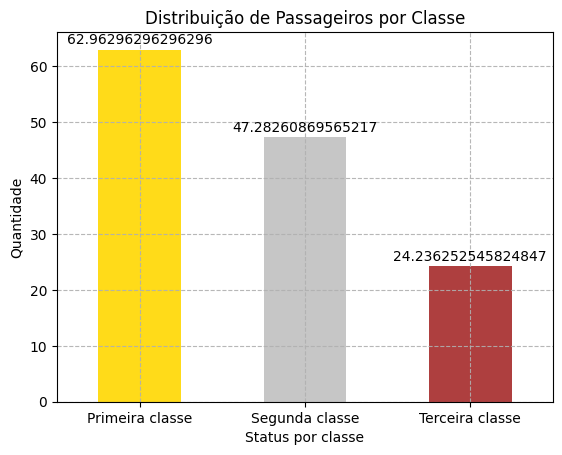

In [40]:
# Criando o gráfico de barras
taxa_sobrevivente_class.plot(kind='bar', color=['gold', 'silver', 'brown'], alpha=0.9)
plt.title('Distribuição de Passageiros por Classe')
plt.xlabel('Status por classe')
plt.ylabel('Quantidade')
plt.xticks([0, 1, 2], ['Primeira classe', 'Segunda classe', 'Terceira classe'], rotation=0) # Rótulos melhorados
plt.grid(True, linestyle='--', alpha=0.9)
for i, v in enumerate(taxa_sobrevivente_class):
    plt.text(i, v + 1, str(v), ha='center', fontsize=10)


Compreendendo a Coluna "Sex"

O que ela representa: "Sex" indica o sexo do passageiro (masculino ou feminino).
Tipo de dado: É uma variável categórica nominal, o que significa que as categorias não têm uma ordem.

In [30]:
agrupando_sex = df_titanic['Sex'].value_counts()
agrupando_sex

Sex
male      577
female    314
Name: count, dtype: int64

Visualização:
Crie um gráfico de barras para visualizar a contagem de passageiros por sexo.

Taxa de sobrevivência por sexo:
Use df_titanic.groupby('Sex')['Survived'].mean() para calcular a taxa de sobrevivência por sexo.

Visualização:
Visualize a taxa de sobrevivência por sexo com um gráfico de barras.

Análise adicional:

Relação com outras colunas: Explore como a taxa de sobrevivência varia em relação a outras colunas, como "Pclass", "Sex" e "Age". Isso pode revelar padrões interessantes.
Tabelas de contingência: Use tabelas de contingência para analisar a relação entre "Survived" e outras colunas categóricas.

Visualização dos dados: Usar gráficos para visualizar a distribuição dos dados numéricos e categóricos. Isso ajudará a identificar padrões e insights que podem não ser aparentes nas estatísticas descritivas.

Análise de correlação: Analisar a correlação entre as variáveis para identificar relações entre elas.